<a href="https://colab.research.google.com/github/Pspranoy/BigMart-Sales-Analysis-of-Product-and-Stores-Features/blob/main/BigMartData_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [256]:
!git clone https://github.com/Pspranoy/BigMart-Sales-Analysis-of-Product-and-Stores-Features.git

fatal: destination path 'BigMart-Sales-Analysis-of-Product-and-Stores-Features' already exists and is not an empty directory.


Importing libraries

In [257]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import seaborn as sbn
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

In [258]:
df_train = pd.read_csv("/content/BigMart-Sales-Analysis-of-Product-and-Stores-Features/Train.csv")
df_test = pd.read_csv("/content/BigMart-Sales-Analysis-of-Product-and-Stores-Features/Test.csv")

Hypothesis generation

In [259]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [260]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


Features like Item_Identifier and Outlet_Identifier do not have any effect of sales numbers so they can be removed

In [261]:
df_train.drop('Item_Identifier',axis=1, inplace=True)
df_train.drop('Outlet_Identifier',axis=1, inplace=True)
df_test.drop('Item_Identifier',axis=1, inplace=True)
df_test.drop('Outlet_Identifier',axis=1, inplace=True)

Doing preliminary exploring

In [262]:
df_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [263]:
df_test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750,Low Fat,0.007565,Snack Foods,107.8622,1999,Medium,Tier 1,Supermarket Type1
1,8.300,reg,0.038428,Dairy,87.3198,2007,NaN,Tier 2,Supermarket Type1
2,14.600,Low Fat,0.099575,Others,241.7538,1998,NaN,Tier 3,Grocery Store
3,7.315,Low Fat,0.015388,Snack Foods,155.0340,2007,NaN,Tier 2,Supermarket Type1
4,NaN,Regular,0.118599,Dairy,234.2300,1985,Medium,Tier 3,Supermarket Type3


In [264]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [265]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                6113 non-null   object 
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 666.0+ KB


In [266]:
df_train.apply(lambda x: len(x.unique()))

Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [267]:
df_train.shape

(8523, 10)

Data Cleanup (Locating Null Values)

In [268]:
df_train.isnull().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [269]:
df_test.isnull().sum()

Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

Item_Weight is a numerical feature and Outlet_Size is a categorical feature

Removing Null values from Item_Weight and replacing with mean value

In [270]:
df_train.Item_Weight = df_train.Item_Weight.fillna(np.mean(df_train.Item_Weight))

In [271]:
df_test.Item_Weight = df_test.Item_Weight.fillna(np.mean(df_test.Item_Weight))

Null values removed from Item_Weight column

In [272]:
df_train.isnull().sum()

Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [273]:
df_test.isnull().sum()

Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

Removing Null values from Outlet_Size

In [274]:
Mode_Outlet_Size_Train = df_train['Outlet_Size'].mode().values[0]
Mode_Outlet_Size_Train

'Medium'

In [275]:
Mode_Outlet_Size_Test = df_test['Outlet_Size'].mode().values[0]
Mode_Outlet_Size_Test

'Medium'

In [276]:
df_train['Outlet_Size']=df_train['Outlet_Size'].fillna(Mode_Outlet_Size_Train)
df_test['Outlet_Size']=df_test['Outlet_Size'].fillna(Mode_Outlet_Size_Test)

df_train.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [277]:
df_test.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

Testing for duplicate records

In [278]:
duplicate = df_train.duplicated()
print("Number of duplicate values: ",duplicate.sum())

Number of duplicate values:  0


Checking for Outliers

<Axes: >

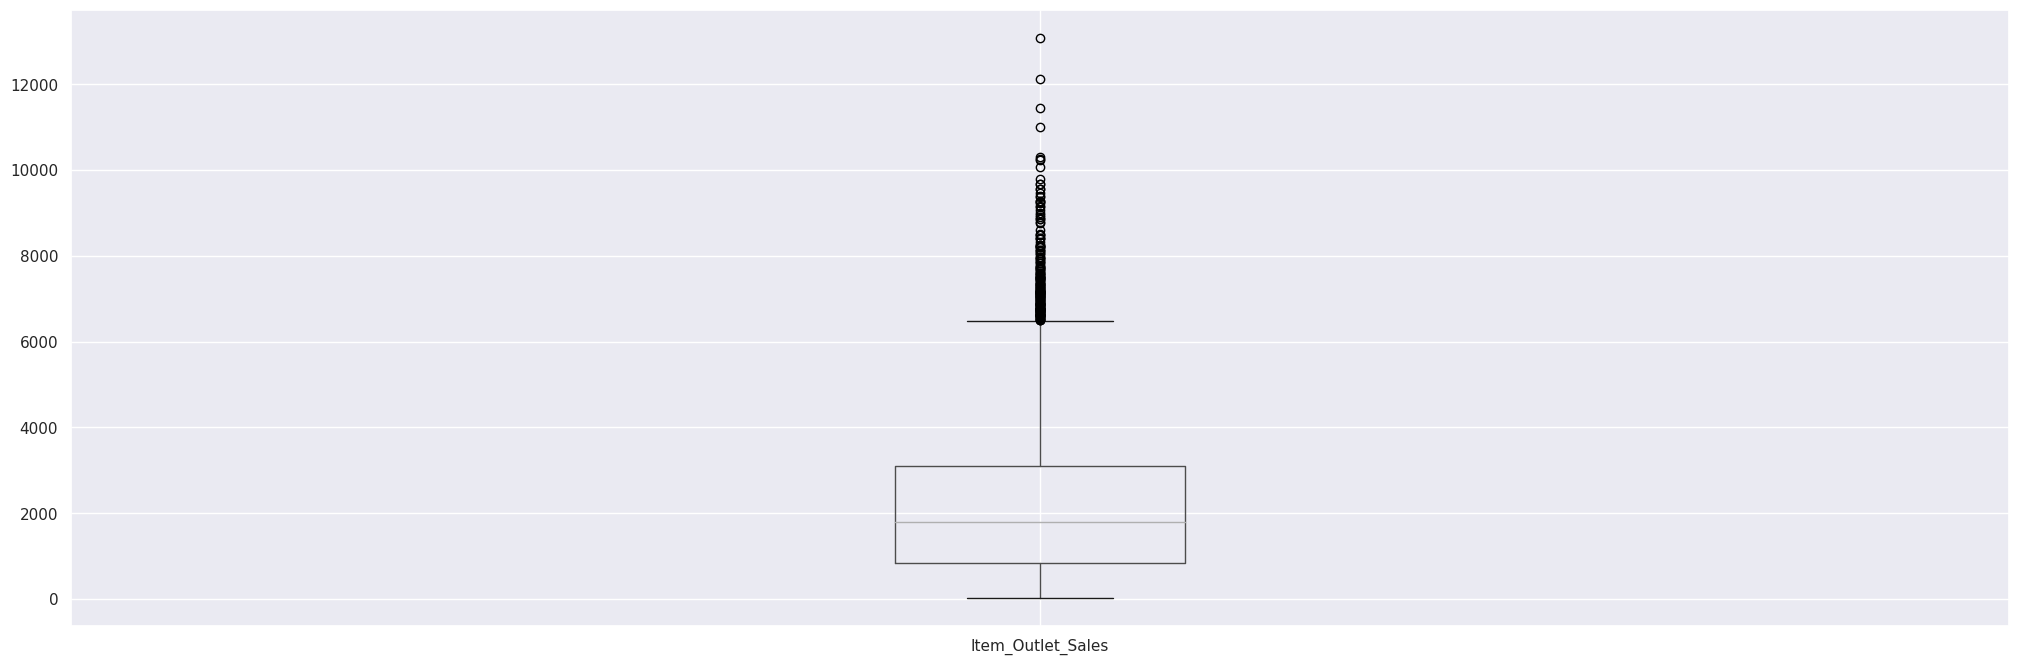

In [279]:
df_train.boxplot(column=['Item_Outlet_Sales'])

Outliers present in Item outlet sales values which needs to be removed

In [280]:
Upper_lim = np.mean(df_train.Item_Outlet_Sales) + 5*np.std(df_train.Item_Outlet_Sales)
Lower_lim = np.mean(df_train.Item_Outlet_Sales) - 5*np.std(df_train.Item_Outlet_Sales)
print("Upper Limit of Sales data is ", Upper_lim)
print("Lower Limit of Sales data is ", Lower_lim)

Upper Limit of Sales data is  10713.286420358008
Lower Limit of Sales data is  -6350.708593207944


Capping data with upper and lower limits

In [281]:
df_train.loc[df_train['Item_Outlet_Sales']>Upper_lim]['Item_Outlet_Sales'] = Upper_lim
df_train.loc[df_train['Item_Outlet_Sales']<Lower_lim]['Item_Outlet_Sales'] = Lower_lim

df_train.describe()

<ipython-input-281-a0acc6061a1a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.loc[df_train['Item_Outlet_Sales']>Upper_lim]['Item_Outlet_Sales'] = Upper_lim


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


EDA

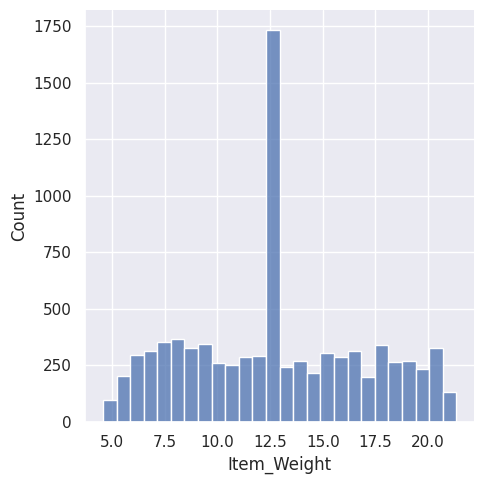

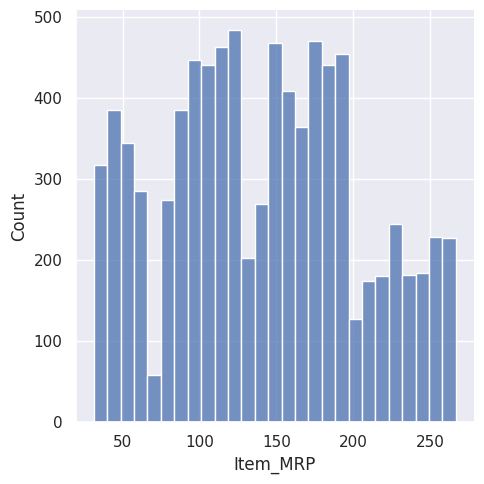

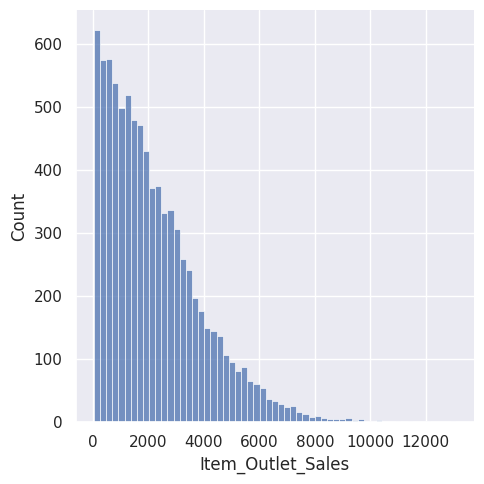

In [282]:
sbn.set(rc={'figure.figsize':(25,8)})
sbn.displot(df_train['Item_Weight'])
sbn.displot(df_train['Item_MRP'])
sbn.displot(df_train['Item_Outlet_Sales'])

Categorical variables are Item_Fat_Content, Item_Type, Outlet_Establishment_Year, Outlet_Size, Outlet_Location_Type, Outlet_Type

<Axes: xlabel='Item_Fat_Content', ylabel='count'>

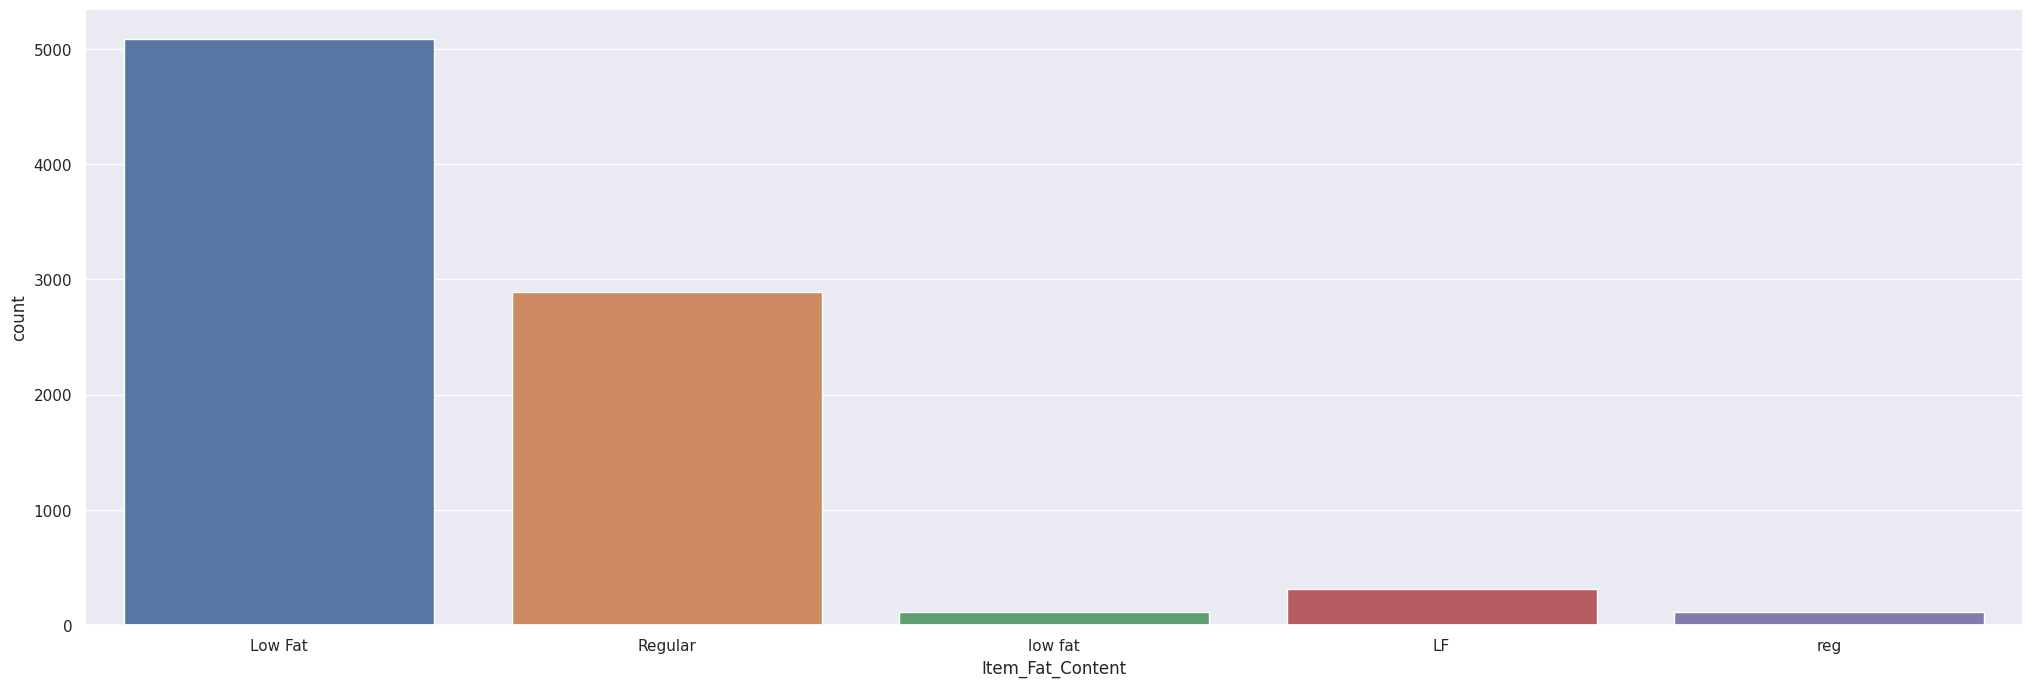

In [283]:
sbn.countplot(x='Item_Fat_Content', data=df_train)

<Axes: xlabel='Item_Type', ylabel='count'>

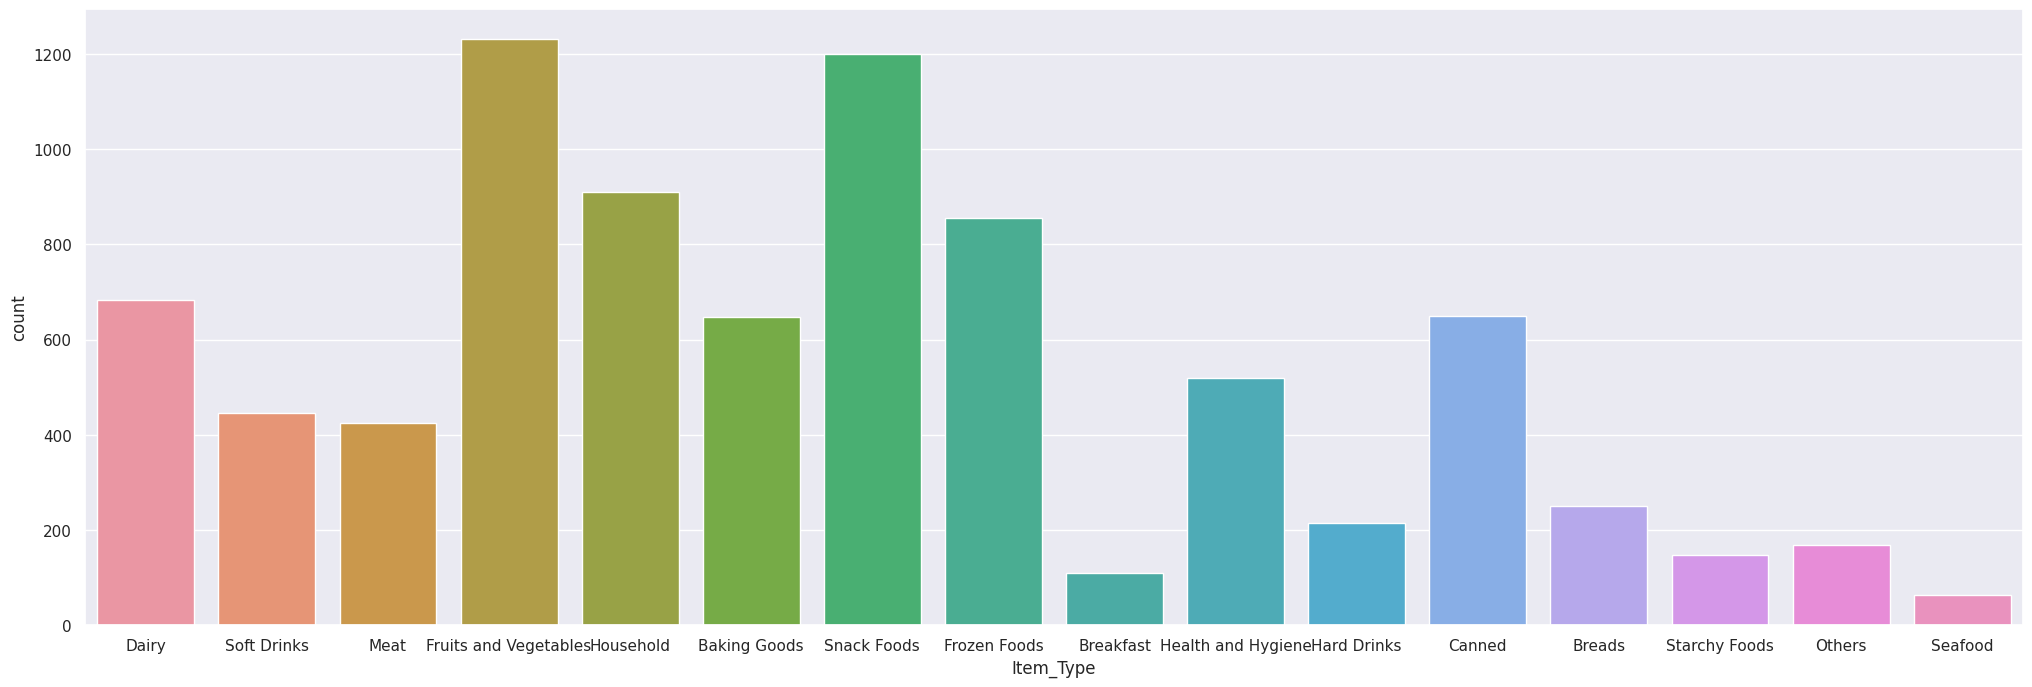

In [284]:
sbn.countplot(x='Item_Type', data=df_train)

<Axes: xlabel='Outlet_Establishment_Year', ylabel='count'>

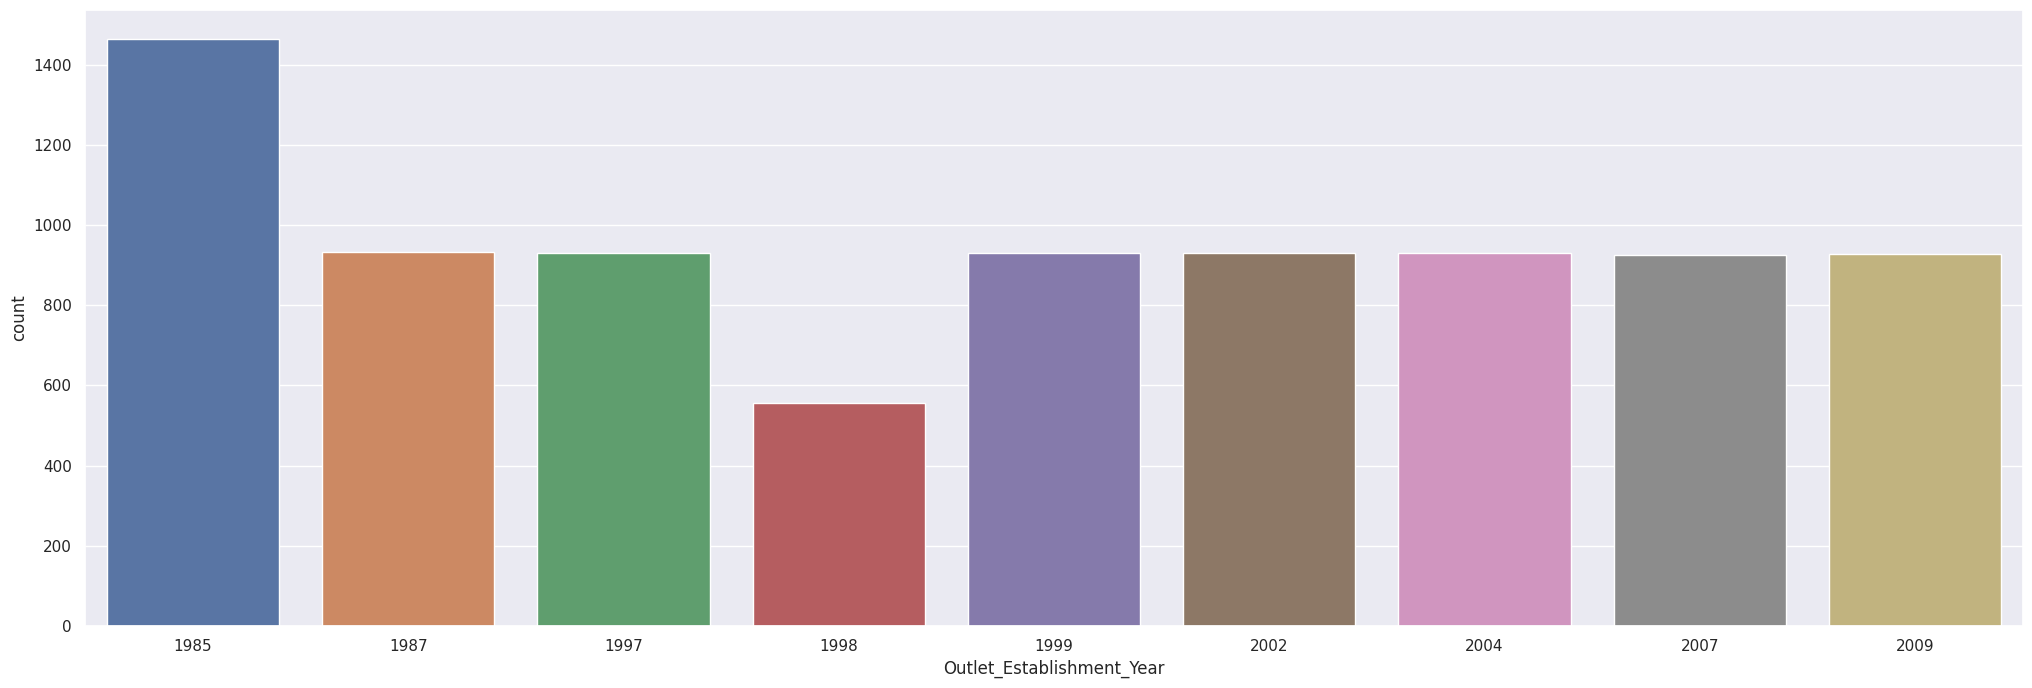

In [285]:
sbn.countplot(x='Outlet_Establishment_Year', data=df_train)

<Axes: xlabel='Outlet_Size', ylabel='count'>

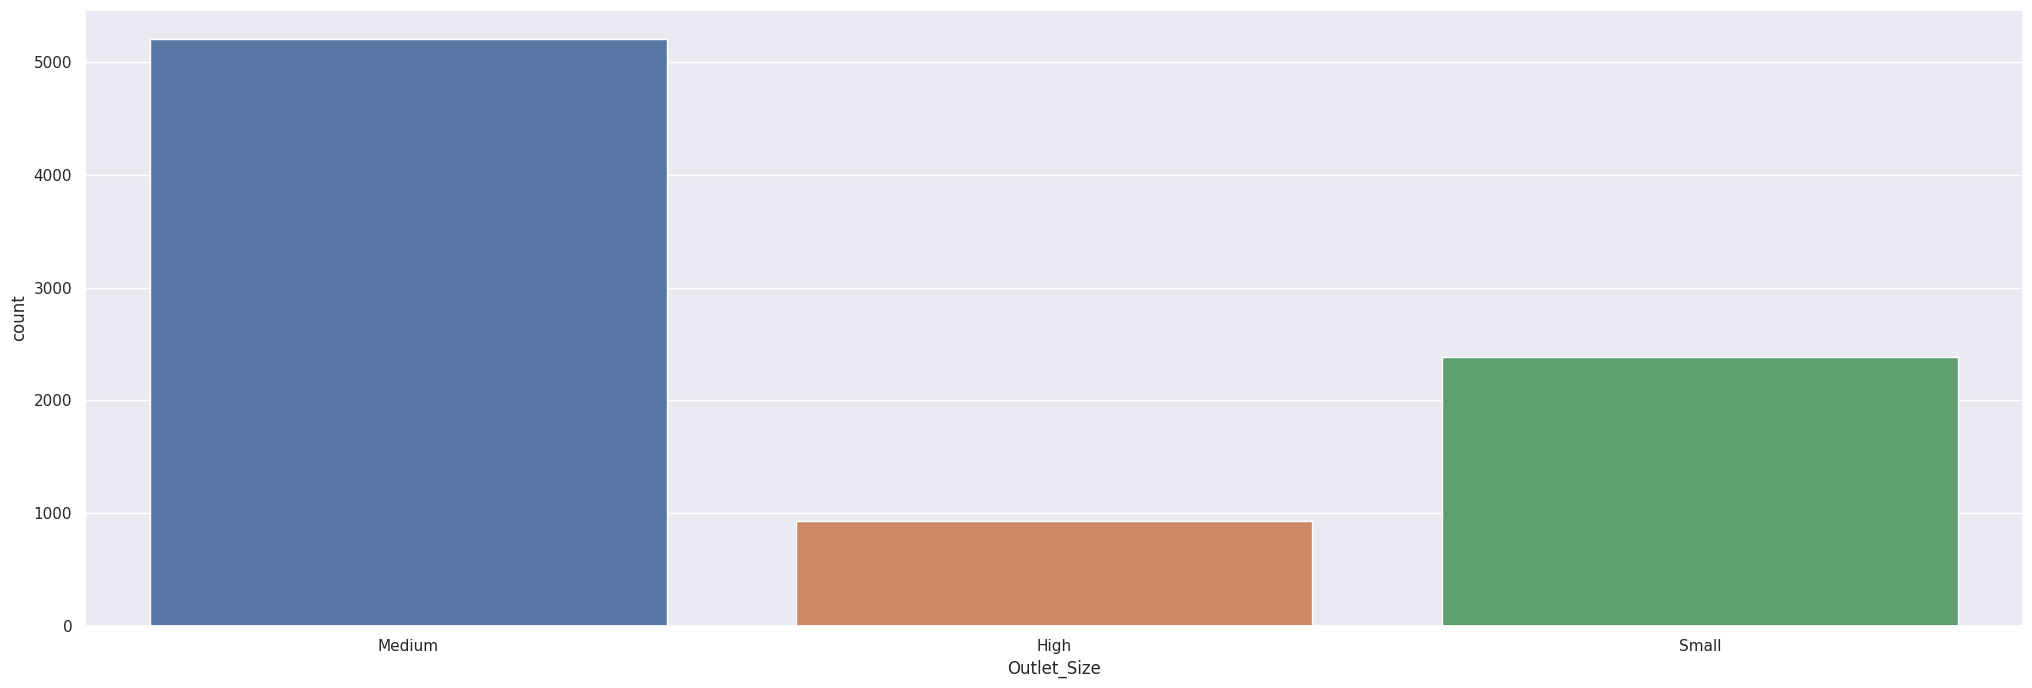

In [286]:
sbn.countplot(x='Outlet_Size', data=df_train)

<Axes: xlabel='Outlet_Type', ylabel='count'>

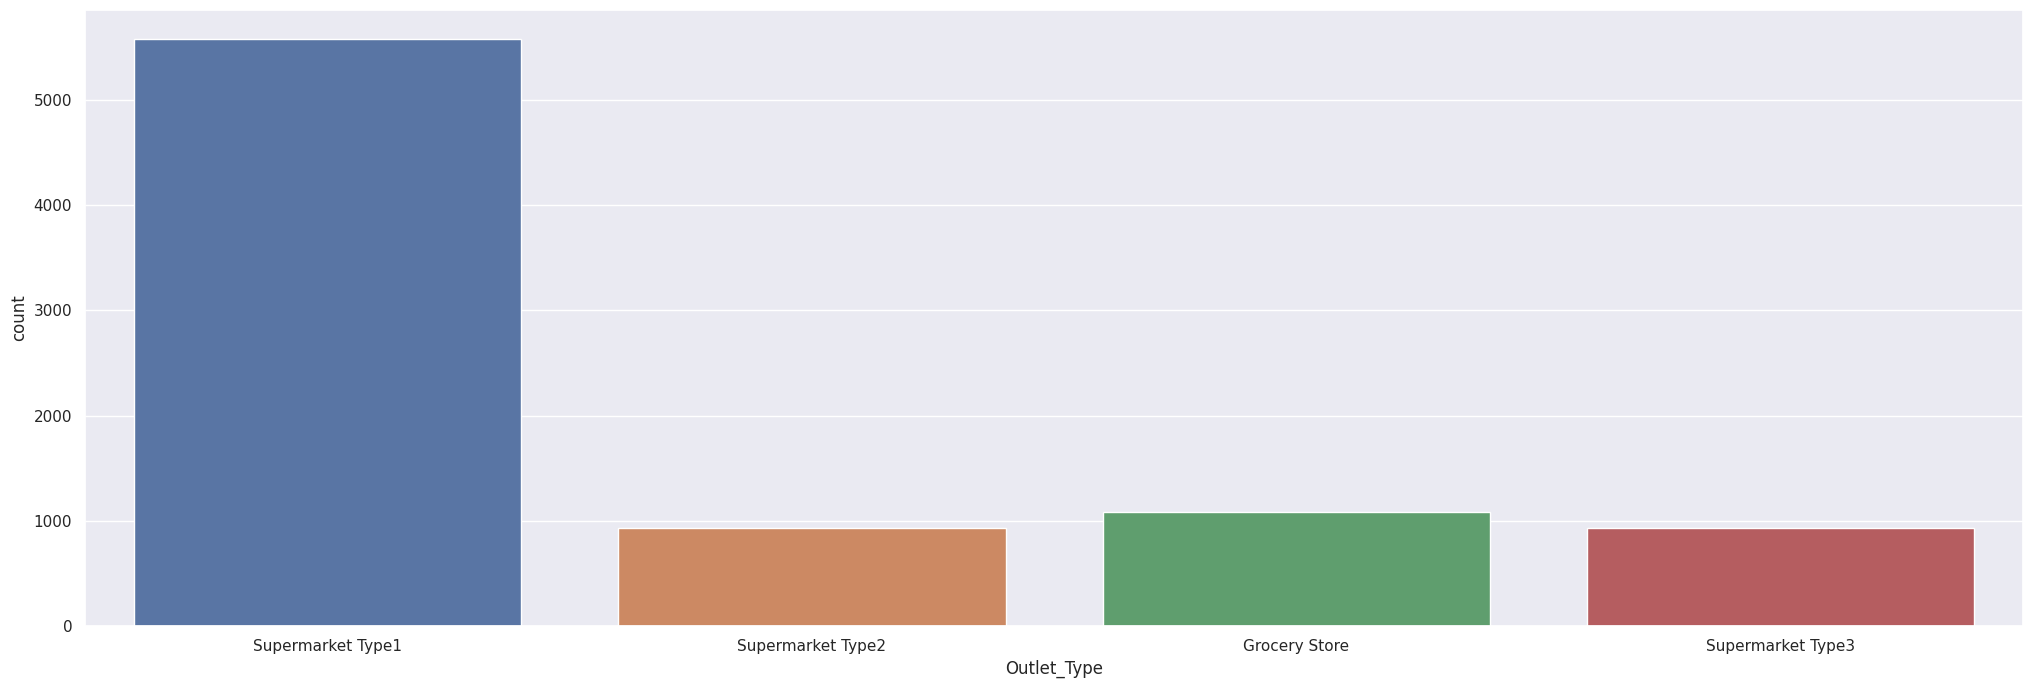

In [287]:
sbn.countplot(x='Outlet_Type', data=df_train)


<Axes: xlabel='Outlet_Location_Type', ylabel='count'>

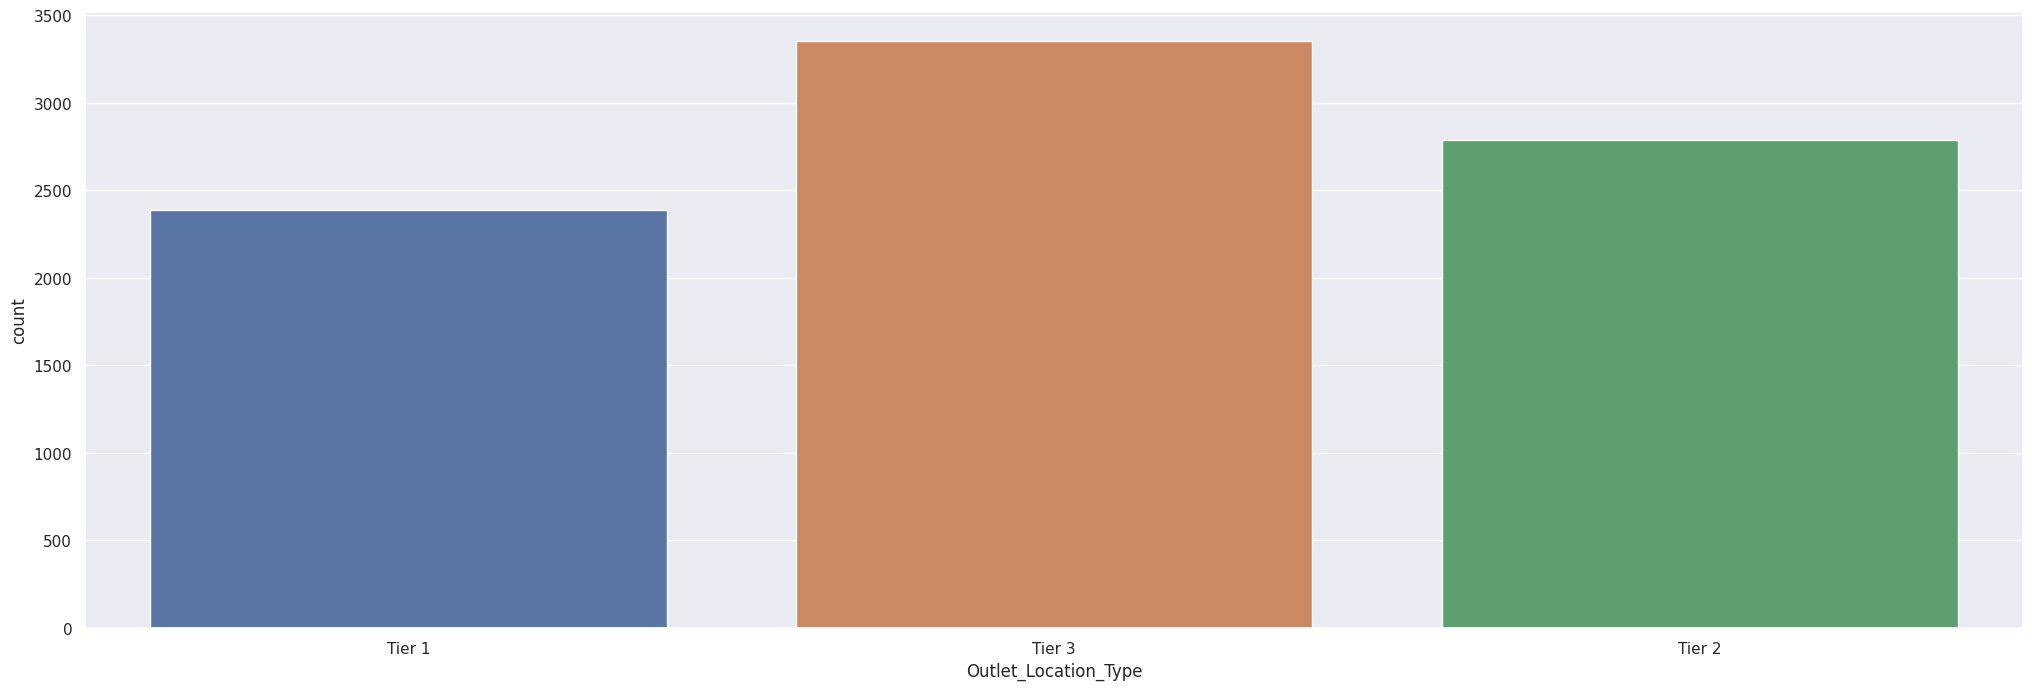

In [288]:
 sbn.countplot(x='Outlet_Location_Type', data=df_train)

Item_Fat_Content has some redundant values such as LF, Reg. We need to merge them

In [289]:
df_train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [290]:
df_train.replace({'Item_Fat_Content':{'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'}}, inplace=True)

In [291]:
df_train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [292]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                8523 non-null   object 
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 666.0+ KB


Label Encoding

In [293]:
encoder = LabelEncoder()
df_train['Item_Fat_Content'] = encoder.fit_transform(df_train['Item_Fat_Content'])
df_train['Item_Type'] = encoder.fit_transform(df_train['Item_Type'])
df_train['Outlet_Establishment_Year'] = encoder.fit_transform(df_train['Outlet_Establishment_Year'])
df_train['Outlet_Size'] = encoder.fit_transform(df_train['Outlet_Size'])
df_train['Outlet_Location_Type'] = encoder.fit_transform(df_train['Outlet_Location_Type'])
df_train['Outlet_Type'] = encoder.fit_transform(df_train['Outlet_Type'])

df_test['Item_Fat_Content'] = encoder.fit_transform(df_test['Item_Fat_Content'])
df_test['Item_Type'] = encoder.fit_transform(df_test['Item_Type'])
df_test['Outlet_Establishment_Year'] = encoder.fit_transform(df_test['Outlet_Establishment_Year'])
df_test['Outlet_Size'] = encoder.fit_transform(df_test['Outlet_Size'])
df_test['Outlet_Location_Type'] = encoder.fit_transform(df_test['Outlet_Location_Type'])
df_test['Outlet_Type'] = encoder.fit_transform(df_test['Outlet_Type'])



In [294]:
df_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,4,249.8092,4,1,0,1,3735.1380
1,5.92,1,0.019278,14,48.2692,8,1,2,2,443.4228
2,17.50,0,0.016760,10,141.6180,4,1,0,1,2097.2700
3,19.20,1,0.000000,6,182.0950,3,1,2,0,732.3800
4,8.93,0,0.000000,9,53.8614,1,0,2,1,994.7052


Training the model

Splitting target and features

In [295]:
Features_Train = df_train.drop(columns='Item_Outlet_Sales', axis=1)
Target = df_train['Item_Outlet_Sales']
print(Features_Train)
print(Target)

      Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  Item_MRP  \
0           9.300                 0         0.016047          4  249.8092   
1           5.920                 1         0.019278         14   48.2692   
2          17.500                 0         0.016760         10  141.6180   
3          19.200                 1         0.000000          6  182.0950   
4           8.930                 0         0.000000          9   53.8614   
...           ...               ...              ...        ...       ...   
8518        6.865                 0         0.056783         13  214.5218   
8519        8.380                 1         0.046982          0  108.1570   
8520       10.600                 0         0.035186          8   85.1224   
8521        7.210                 1         0.145221         13  103.1332   
8522       14.800                 0         0.044878         14   75.4670   

      Outlet_Establishment_Year  Outlet_Size  Outlet_Location_Type  \
0    

Using XGBoost Regressor

In [296]:
reg = XGBRegressor()
reg.fit(Features_Train,Target)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

Evaluating model based on training data

In [297]:
train_prediction = reg.predict(Features)

R-Squared Value

In [298]:
r2_train = r2_score(Target, train_prediction)
print("R Squared score is: ",r2_train)

R Squared score is:  0.8261288297599645


Validating on test data

In [299]:
test_prediction = reg.predict(df_test)

In [300]:
print(test_prediction)

[1381.2622  1249.0398   588.32214 ... 1781.6646  4917.71    1322.0957 ]
